In [77]:
from IPython.display import Image
%matplotlib inline

# Data analysis tools (Numpy and Pandas)

In [164]:
import numpy as np
# initialize an empty array with size 2 x 2
empty_arr = np.empty((2, 2))
print("An empty array is \n", empty_arr, " with dimensions ", empty_arr.shape, "\n")

# initialize an all zero array with size 2 x 3
zeros_arr = np.zeros((2, 3))
print("A zeros array is \n", zeros_arr, " with dimensions ", zeros_arr.shape, "\n")

# initialize an all one array with size 4 x 2
ones_arr = np.ones((4, 2))
print("A ones array is \n", ones_arr, " with dimensions ", ones_arr.shape, "\n")

range_arr = np.arange(8)
print("A range array is \n", range_arr, " with dimensions ", range_arr.shape, "\n")

range_arr = range_arr.reshape(4,2)
print("A range array is \n", range_arr, " with dimensions ", range_arr.shape, "\n")

range_arr_transpose = range_arr.T
print("A range array is \n", range_arr_transpose, " with dimensions ", range_arr_transpose.shape, "\n")

An empty array is 
 [[0.34583333 0.0375    ]
 [0.65416667 0.9625    ]]  with dimensions  (2, 2) 

A zeros array is 
 [[0. 0. 0.]
 [0. 0. 0.]]  with dimensions  (2, 3) 

A ones array is 
 [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]  with dimensions  (4, 2) 

A range array is 
 [0 1 2 3 4 5 6 7]  with dimensions  (8,) 

A range array is 
 [[0 1]
 [2 3]
 [4 5]
 [6 7]]  with dimensions  (4, 2) 

A range array is 
 [[0 2 4 6]
 [1 3 5 7]]  with dimensions  (2, 4) 



In [165]:
range_arr + ones_arr

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])

In [166]:
range_arr * 2

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14]])

In [167]:
range_arr

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [168]:
print("first column \n", range_arr[:,0])
print("second column \n", range_arr[:,1])

first column 
 [0 2 4 6]
second column 
 [1 3 5 7]


In [169]:
B = np.array([[1],[2]])
print(B)
print(B.shape)

[[1]
 [2]]
(2, 1)


In [170]:
range_arr @ B

array([[ 2],
       [ 8],
       [14],
       [20]])

In [171]:
np.dot(range_arr, B)

array([[ 2],
       [ 8],
       [14],
       [20]])

# Exploring the Ames Housing dataset
## Loading the Ames Housing dataset into a data frame
* Dataset source: http://jse.amstat.org/v19n3/decock/AmesHousing.txt
* Dataset documentation: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
* Dataset write-up: http://jse.amstat.org/v19n3/decock.pdf
* 'Overall Qual': Rates the overall material and finish of the house
* 'Overall Cond': Rates the overall condition of the house
 10	Very Excellent
 9	Excellent
 8	Very Good
 7	Good
 6	Above Average	
 5	Average
 4	Below Average	
 3	Fair
 2	Poor
 1	Very Poor
* 'Gr Liv Area': Above grade (ground) living area square feet
* 'Central Air': Central air conditioning
 N	No
 Y	Yes
* 'Total Bsmt SF': Total square feet of basement area
* 'SalePrice': Sale price $$

In [172]:
import pandas as pd


columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [173]:

df.shape

(2930, 6)

In [174]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [175]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [176]:
# remove rows that contain missing values

df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

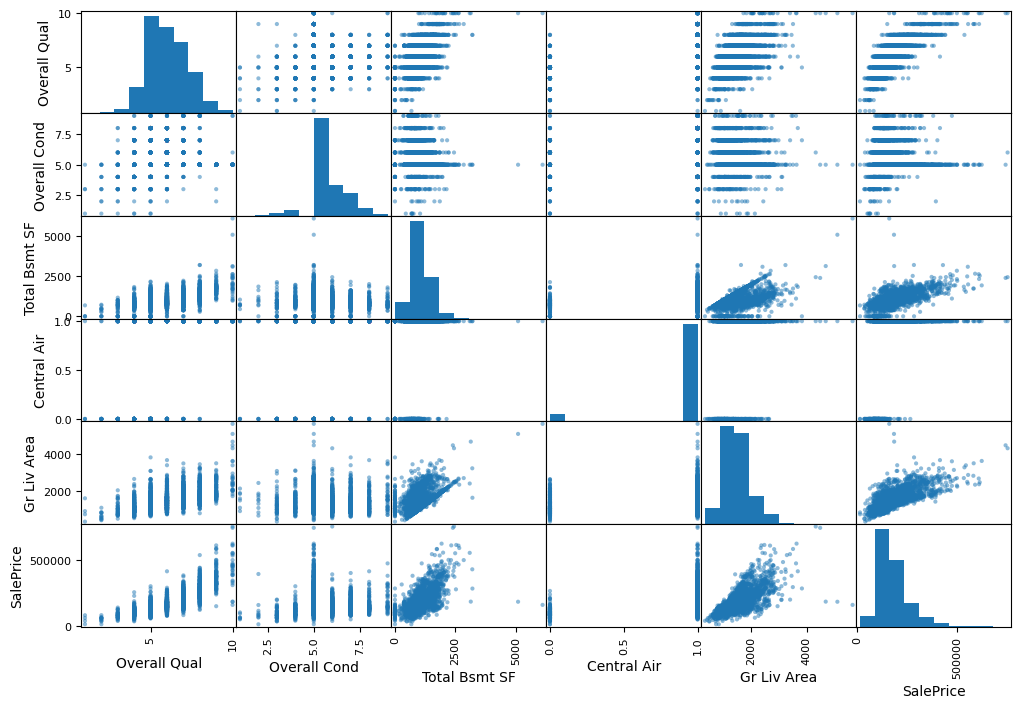

In [177]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(df, figsize=(12, 8))

plt.show()

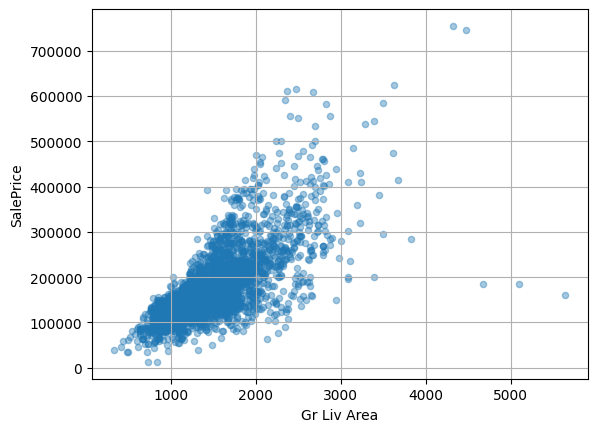

In [178]:
df.plot(kind="scatter", x="Gr Liv Area", y="SalePrice",
             alpha=0.4, grid=True)

plt.show()

## Variable standardization

In [179]:
df["Gr Liv Area"]

0       1656
1        896
2       1329
3       2110
4       1629
        ... 
2925    1003
2926     902
2927     970
2928    1389
2929    2000
Name: Gr Liv Area, Length: 2929, dtype: int64

<Axes: >

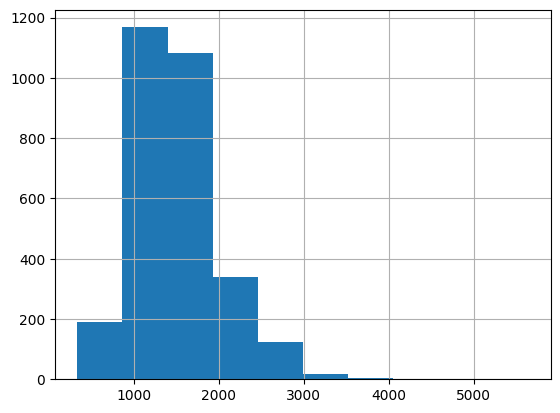

In [180]:
df["Gr Liv Area"].hist()

In [181]:
df["Gr Liv Area Std"] = (df["Gr Liv Area"] - df["Gr Liv Area"].mean()) /df["Gr Liv Area"].std()
df["Gr Liv Area Std"]

0       0.308827
1      -1.194718
2      -0.338093
3       1.206997
4       0.255412
          ...   
2925   -0.983035
2926   -1.182848
2927   -1.048320
2928   -0.219392
2929    0.989379
Name: Gr Liv Area Std, Length: 2929, dtype: float64

<Axes: >

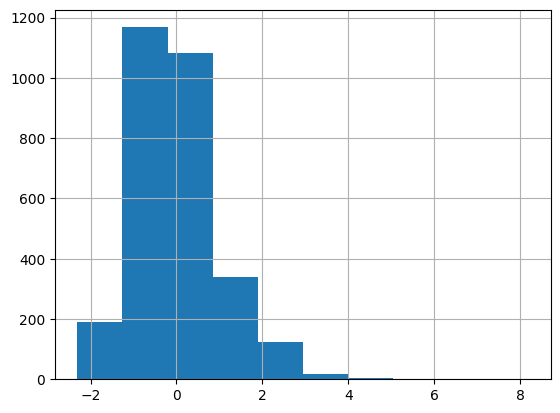

In [182]:
df["Gr Liv Area Std"].hist()

# Simple linear regression

$$
 y = w_0 + w_1 x + \epsilon
$$

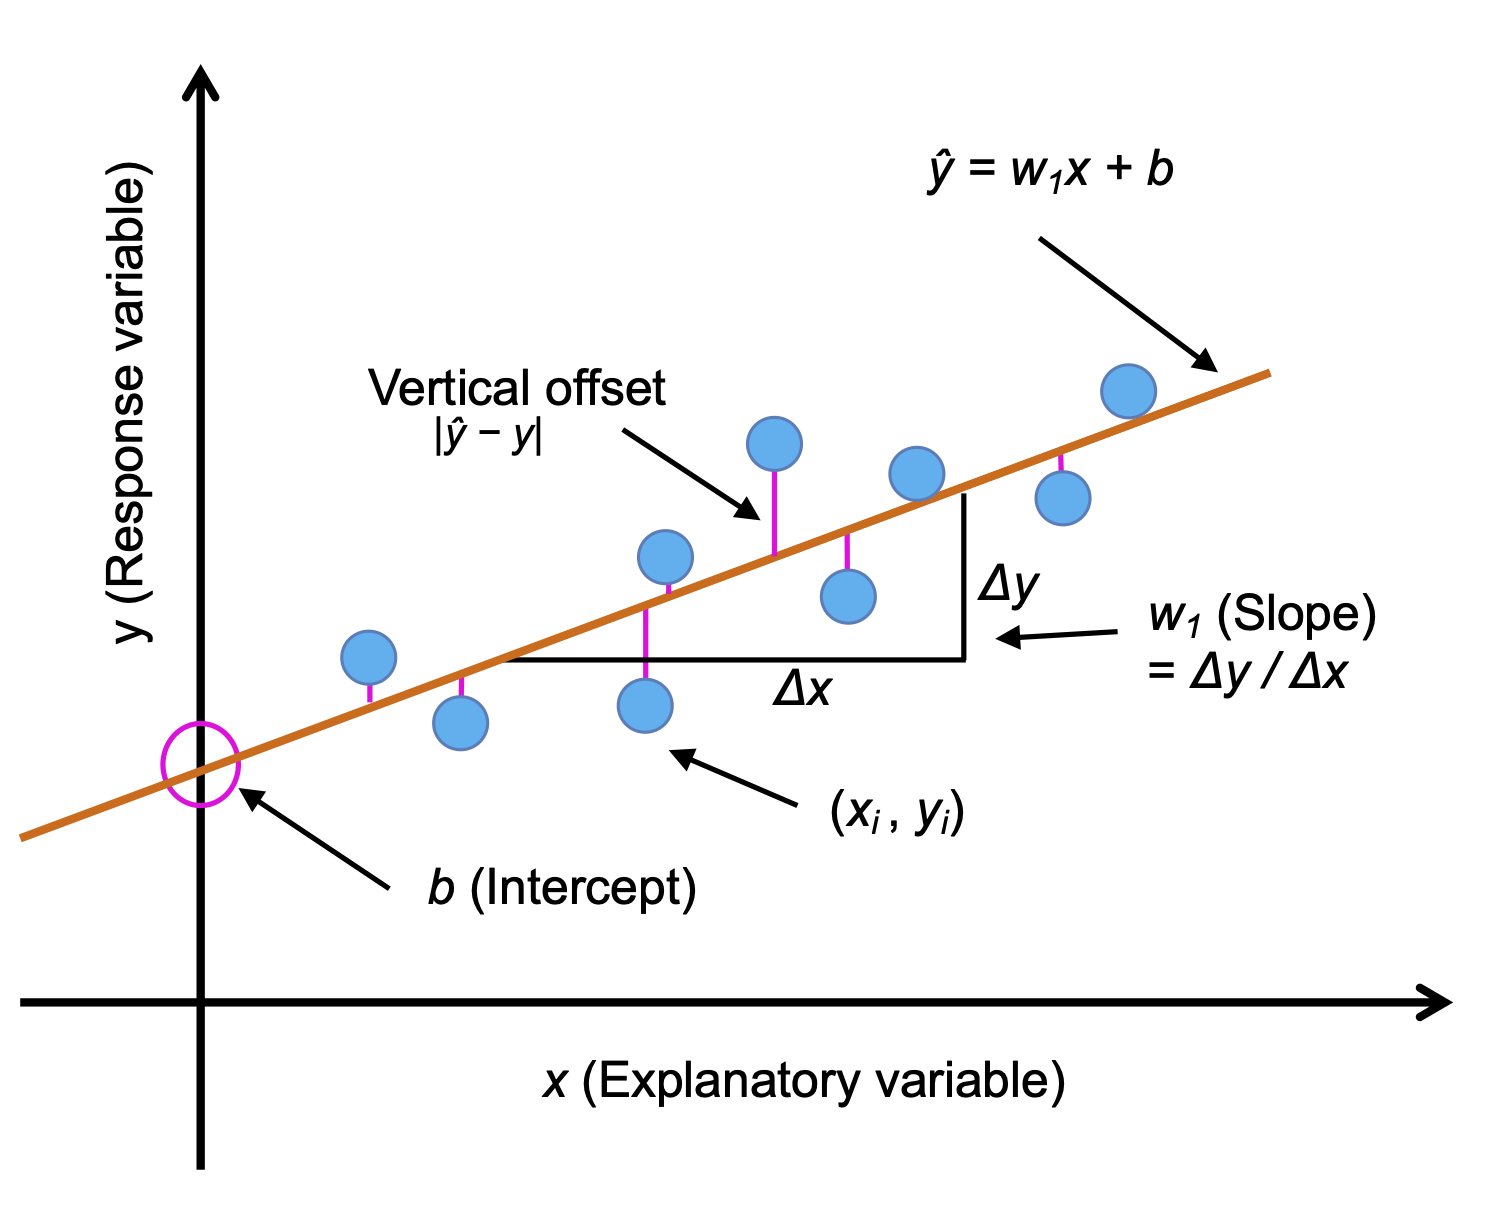

In [183]:
Image(filename='figures/simple-linear-regression.png', width=500) 


## Questions: 
* How do we fit this line?
* We know that it is specified with two parameters (w_0 and w_1), that is for each (w_0 and w_1) we get a line, there are an infinite number of lines I can choose from, how do I find the best one (ie. the most useful one for the prediction purpose)?


### Idea: Learning as a optimisation problem
* We have some sort of objective function, and we can find the optimal (w_0 and w_1) by solving this objective function.


## Question: 
* How can we quantify error?
* Given a w_0, w_1, can you express this error in a math equation? 

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
= \frac{1}{n} \sum_{i=1}^{n} (y_i - (w_0 + w_1x_i))^2
$$

$$
\frac{dL}{dw_1} = \frac{1}{n} \sum_{i=1}^{n} 2(y_i - (w_0 + w_1x_i))\frac{d}{dw_1}(y_i - (w_0 + w_1x_i) =  -\frac{2}{n} \sum_{i=1}^{n} (y_i - (w_0 + w_1x_i))x_i
$$

$$
\frac{dL}{dw_0} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (w_0 + w_1x_i))
$$

## Fitting linear regression using gradient descent

In [184]:
import numpy as np
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.predict(X)
            errors = (y - output)
            # TODO: update w and b
            # self.w += 
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def predict(self, X):
        return np.dot(X, self.w_) + self.b_



In [185]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

Text(0, 0.5, 'Sale price')

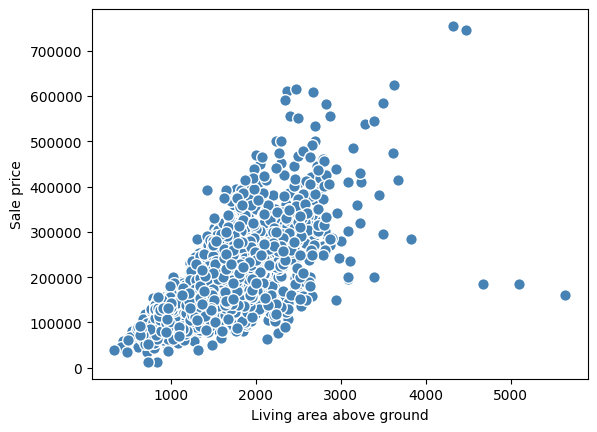

In [186]:
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.xlabel('Living area above ground')
plt.ylabel('Sale price')

Text(0, 0.5, 'Sale price')

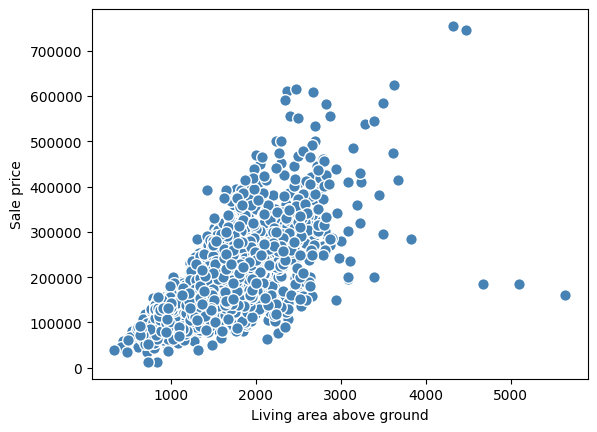

In [187]:
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.xlabel('Living area above ground')
plt.ylabel('Sale price')

In [188]:
X_std = (X - X.mean()) / X.std()
y_std = (y - y.mean()) / y.std()

Text(0, 0.5, 'Sale price (standardized)')

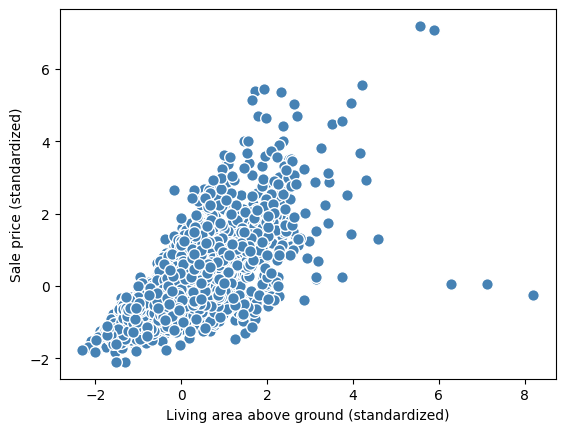

In [189]:
plt.scatter(X_std, y_std, c='steelblue', edgecolor='white', s=70)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

In [190]:
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

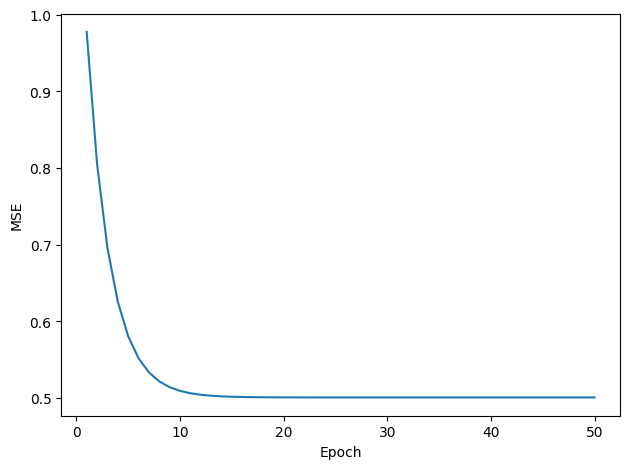

In [191]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Sale price (standardized)')

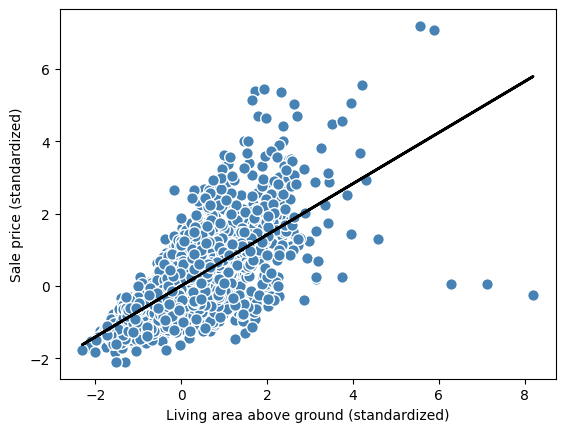

In [192]:
plt.scatter(X_std, y_std, c='steelblue', edgecolor='white', s=70)
plt.plot(X_std, lr.predict(X_std), color='black', lw=2)  
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

In [193]:
X_std.shape

(2929, 1)

In [194]:
lr.w_.shape

(1,)

In [195]:
np.dot(X_std, lr.w_)

array([ 0.21826013, -0.84435382, -0.2389435 , ..., -0.74088877,
       -0.15505293,  0.69923276])

In [196]:
X_std.T * lr.w_

array([[ 0.21826013, -0.84435382, -0.2389435 , ..., -0.74088877,
        -0.15505293,  0.69923276]])

In [197]:
X_std * lr.w_

array([[ 0.21826013],
       [-0.84435382],
       [-0.2389435 ],
       ...,
       [-0.74088877],
       [-0.15505293],
       [ 0.69923276]])

In [198]:
X_std

array([[ 0.30887979],
       [-1.19492198],
       [-0.33815071],
       ...,
       [-1.04849917],
       [-0.21942951],
       [ 0.98954796]])

### Question: Given we have a trained model. How do we use it to predict housing prices? 
#### Exercise: Use the model to predict the price for a house with a living are above ground of 2500sq

In [199]:
feature_std = (2500 - X.mean()) / X.std()
target_std = lr.predict(feature_std)
target_original = target_std * y.std() + y.mean()
print(feature_std)
print(target_std)
print(target_original)
print(f'Sale price: ${target_original.flatten()[0]:.2f}')

1.9788912263354677
[1.39832089]
[292507.06743664]
Sale price: $292507.07


# Multiple Learn Regression

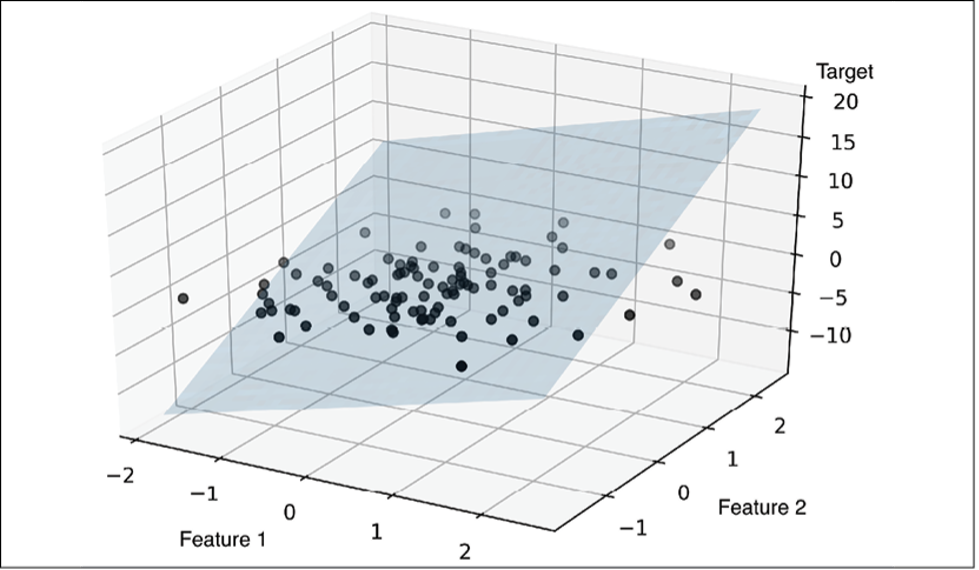

In [200]:
Image(filename='figures/multiple-linear-regression.png', width=500) 

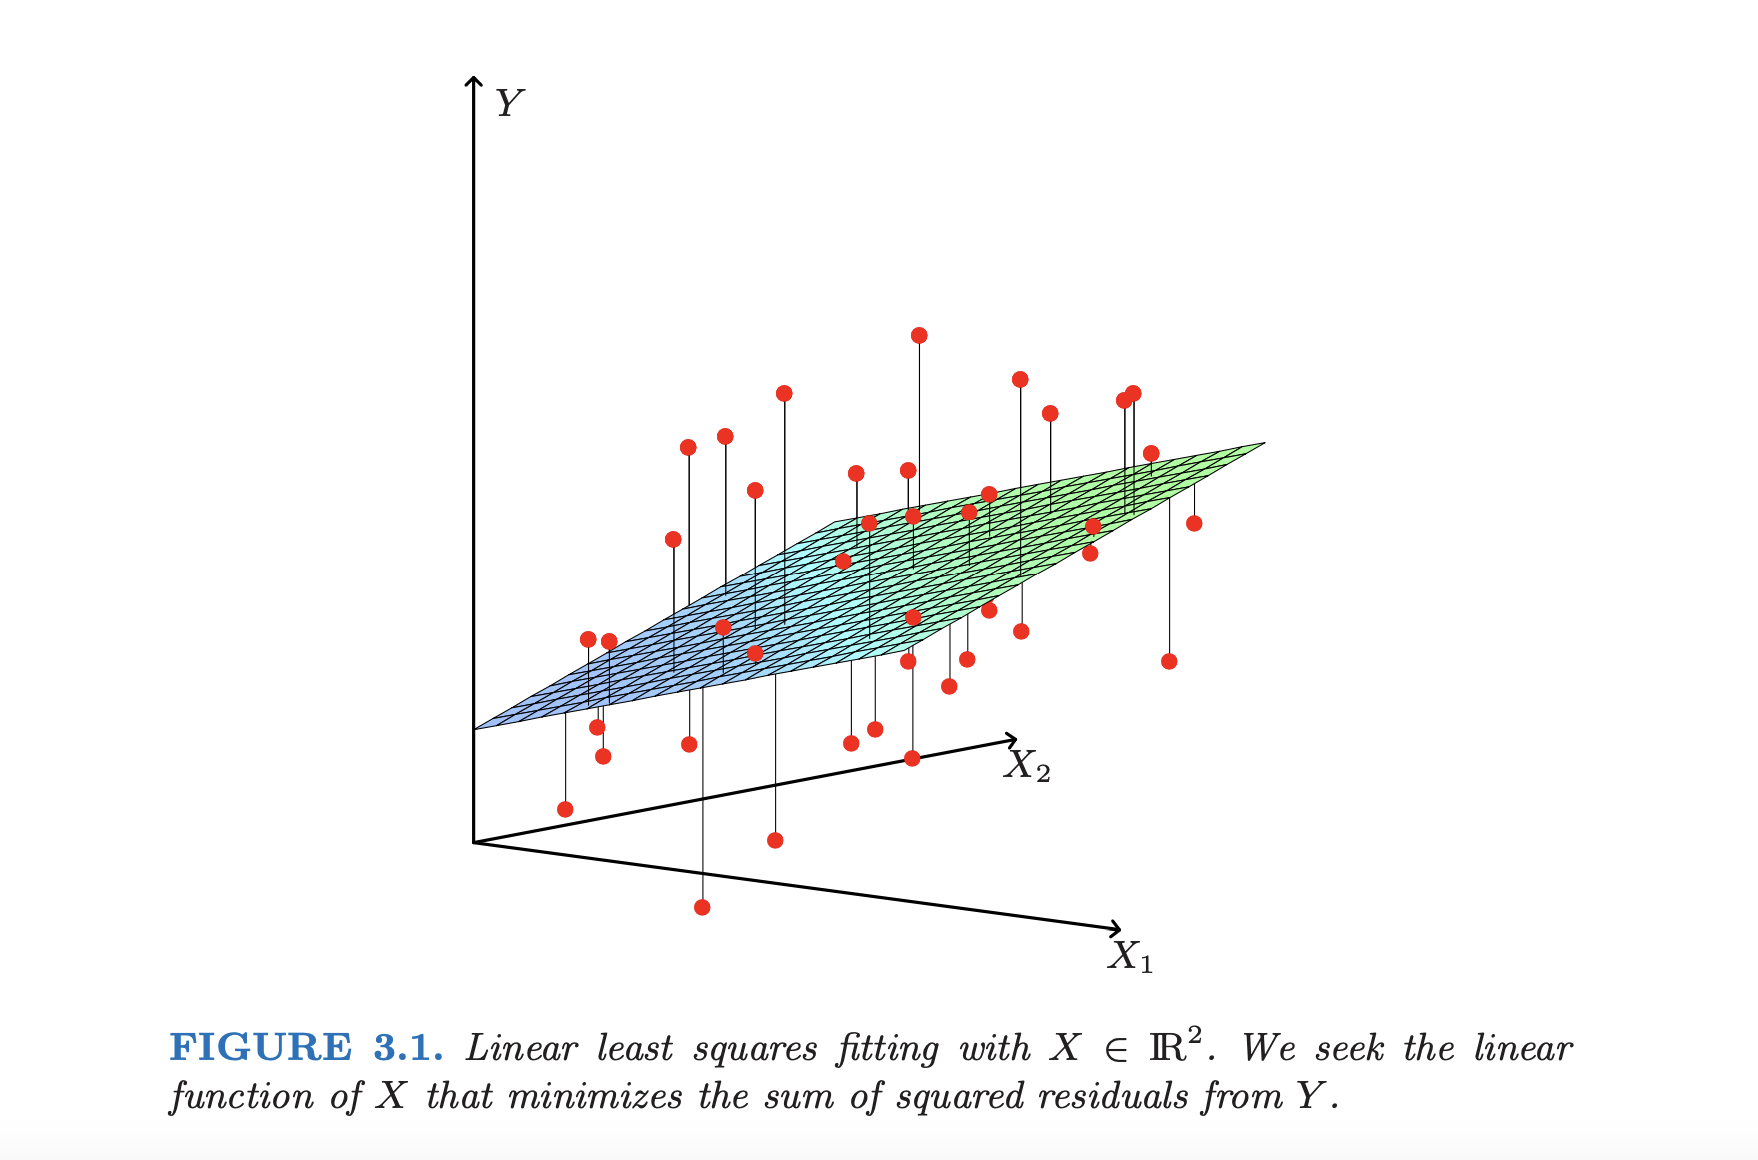

In [201]:
Image(filename='figures/mutiple-linear-regression2.png', width=500) 

In [202]:
df.corr()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice,Gr Liv Area Std
Overall Qual,1.000000,-0.094219,0.547294,0.287443,0.570304,0.799138,0.570304
Overall Cond,-0.094219,1.000000,-0.173344,0.119611,-0.115176,-0.101191,-0.115176
Total Bsmt SF,0.547294,-0.173344,1.000000,0.218726,0.444675,0.632280,0.444675
Central Air,0.287443,0.119611,0.218726,1.000000,0.123358,0.264700,0.123358
Gr Liv Area,0.570304,-0.115176,0.444675,0.123358,1.000000,0.706628,1.000000
SalePrice,0.799138,-0.101191,0.632280,0.264700,0.706628,1.000000,0.706628
Gr Liv Area Std,0.570304,-0.115176,0.444675,0.123358,1.000000,0.706628,1.000000


In [203]:
X = df[['Gr Liv Area', 'Total Bsmt SF']].values
y = df['SalePrice'].values

In [204]:
X

array([[1656., 1080.],
       [ 896.,  882.],
       [1329., 1329.],
       ...,
       [ 970.,  912.],
       [1389., 1389.],
       [2000.,  996.]])

In [205]:
X_std = (X - X.mean()) / X.std()
y_std = (y - y.mean()) / y.std()

In [206]:
X_std

array([[ 0.72511848, -0.37330187],
       [-0.72418615, -0.75088387],
       [ 0.10153609,  0.10153609],
       ...,
       [-0.58306965, -0.69367448],
       [ 0.21595488,  0.21595488],
       [ 1.38111953, -0.53348818]])

In [207]:
X_std[0]

array([ 0.72511848, -0.37330187])

In [208]:
X_std[:,0]

array([ 0.72511848, -0.72418615,  0.10153609, ..., -0.58306965,
        0.21595488,  1.38111953])

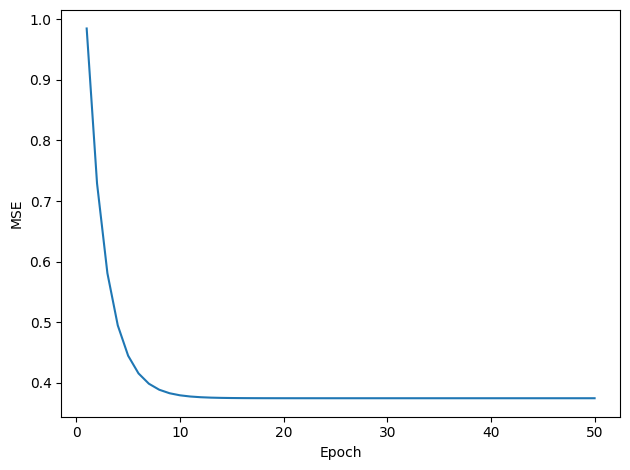

In [211]:
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

In [212]:
######################## Prepare model data point for visualization ###############################
sale_prices =  df['SalePrice'].values
std_sale_prices = (sale_prices - sale_prices.mean())/sale_prices.std()
z = std_sale_prices
x = X_std[:, 0]
y = X_std[:, 1]


x_pred = np.linspace(x.min(), x.max(), 30)   # range of living area (standardized) values
y_pred = np.linspace(y.min(), y.max(), 30)  # range of base area (standardized) values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

predicted = lr.predict(model_viz)

In [213]:
x_pred

array([-1.79590879, -1.44686573, -1.09782268, -0.74877962, -0.39973656,
       -0.0506935 ,  0.29834956,  0.64739262,  0.99643568,  1.34547874,
        1.69452179,  2.04356485,  2.39260791,  2.74165097,  3.09069403,
        3.43973709,  3.78878015,  4.13782321,  4.48686626,  4.83590932,
        5.18495238,  5.53399544,  5.8830385 ,  6.23208156,  6.58112462,
        6.93016768,  7.27921074,  7.62825379,  7.97729685,  8.32633991])

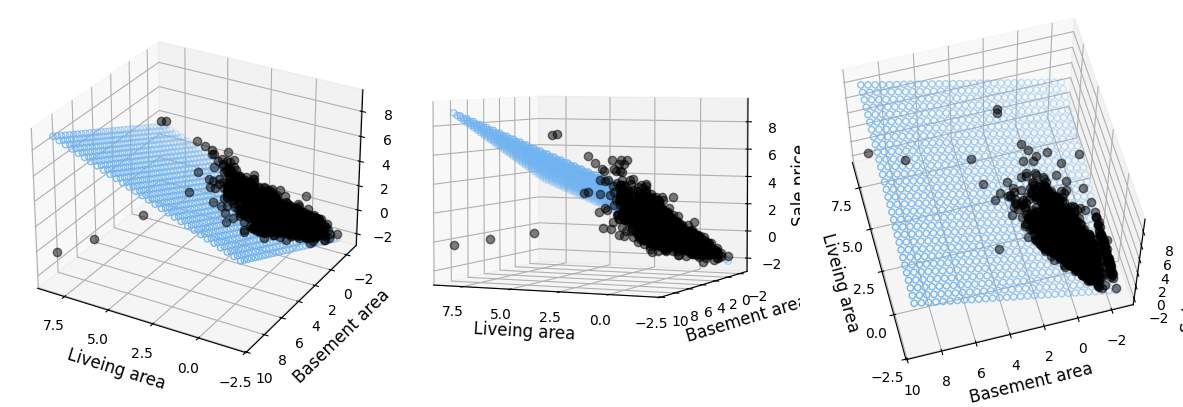

In [214]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]


for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Liveing area', fontsize=12)
    ax.set_ylabel('Basement area', fontsize=12)
    ax.set_zlabel('Sale price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, '', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.3)
ax2.text2D(0.3, 0.42, '', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.3)
ax3.text2D(0.85, 0.85, '', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.3)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)



fig.tight_layout()

In [215]:
lr.w_

array([0.55065898, 0.47141802])

# References
* https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb
* https://github.com/rasbt/machine-learning-book
* https://www.cs.toronto.edu/~bonner/courses/2021f/csc311/lectures/lec03_linear_regression.pdf
* https://www.cs.toronto.edu/~bonner/courses/2021f/csc311/tutorials/tut02_PD_review.pdf